In [3]:
import pandas as pd
import numpy as np

In [4]:
csv=pd.read_csv("train.csv")
csv.mean()

id         4.999500e+03
rho        1.756800e+01
650_src    1.802125e-01
660_src    2.035285e-01
670_src    2.298040e-01
               ...     
990_dst    2.364072e-10
hhb        7.990686e+00
hbo2       4.009146e+00
ca         9.019226e+00
na         3.042651e+00
Length: 76, dtype: float64

In [5]:
size=len(csv)
x_col=csv.columns[1:-4]
isNan=csv.isna()


x=csv[[i for i in x_col]].as_matrix()
x=[]
for i in range(size):
    temp=[]
    for col in x_col:
        #결측치면 평균으로
        if isNan[col][i]:
            temp.append(csv.mean()[col])
        else:
            temp.append(csv[col][i])
    x.append(temp)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
x=np.array(x,dtype=np.float64)

In [7]:
y_col=csv.columns[-4:]
y=csv[[i for i in y_col]].as_matrix()
print(y)

[[ 5.59  4.32  8.92  4.29]
 [ 0.    2.83  7.25  4.64]
 [10.64  3.    8.4   5.16]
 ...
 [ 9.84  3.2  10.45  2.06]
 [ 6.38  4.06 11.28  4.03]
 [ 9.35  4.34  9.73  3.54]]


C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
import tensorflow as tf
from tensorflow.keras import layers

In [14]:
def dnn(x,y):
    model = tf.keras.Sequential()  #순차적 계층화 준비
    model.add(layers.Dense(140, input_shape=(71,))) 
    model.add(layers.Activation('relu')) 

    model.add(layers.Dense(140))  
    model.add(layers.Activation('relu'))

    model.add(layers.Dense(140))  
    model.add(layers.Activation('relu'))
    
    model.add(layers.Dense(4))

    # 모델 구축하기
    model.compile(
        loss='mse',
        optimizer="adam",
        metrics=['mae'])
    
    hist = model.fit(
    x, y,
    batch_size=100,  #100개에 한 번씩 업데이터 실행
    epochs=800,     
    validation_split=0.2,  
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)],  
      #'val_loss'를 monitor하여 감소하면 한 번 더(1) 참고 조기중지
    verbose=1)
    
    return hist,model


In [15]:
hist,model=dnn(x,y)

Train on 8000 samples, validate on 2000 samples
Epoch 1/800
8000/8000 [==============================] - 3s 316us/sample - loss: 10.1761 - mae: 2.3889 - val_loss: 7.7107 - val_mae: 2.0840
Epoch 2/800
8000/8000 [==============================] - 0s 41us/sample - loss: 6.9145 - mae: 1.9752 - val_loss: 6.3760 - val_mae: 1.8931
Epoch 3/800
8000/8000 [==============================] - 0s 34us/sample - loss: 6.0905 - mae: 1.8540 - val_loss: 6.0212 - val_mae: 1.8450
Epoch 4/800
8000/8000 [==============================] - 0s 33us/sample - loss: 5.8282 - mae: 1.8185 - val_loss: 5.8539 - val_mae: 1.8215
Epoch 5/800
8000/8000 [==============================] - 0s 36us/sample - loss: 5.8252 - mae: 1.8156 - val_loss: 5.8791 - val_mae: 1.8240
Epoch 6/800
8000/8000 [==============================] - 0s 31us/sample - loss: 5.6943 - mae: 1.7963 - val_loss: 5.7829 - val_mae: 1.8081
Epoch 7/800
8000/8000 [==============================] - 0s 36us/sample - loss: 5.6872 - mae: 1.7951 - val_loss: 5.8270 - 

8000/8000 [==============================] - 0s 33us/sample - loss: 5.5343 - mae: 1.7695 - val_loss: 5.7334 - val_mae: 1.7981
Epoch 60/800
8000/8000 [==============================] - 0s 34us/sample - loss: 5.5545 - mae: 1.7736 - val_loss: 5.7148 - val_mae: 1.7960
Epoch 61/800
8000/8000 [==============================] - 0s 30us/sample - loss: 5.5422 - mae: 1.7700 - val_loss: 5.8698 - val_mae: 1.8199
Epoch 62/800
8000/8000 [==============================] - 0s 33us/sample - loss: 5.5664 - mae: 1.7754 - val_loss: 5.7323 - val_mae: 1.7994
Epoch 63/800
8000/8000 [==============================] - 0s 32us/sample - loss: 5.5383 - mae: 1.7695 - val_loss: 5.7339 - val_mae: 1.7987
Epoch 64/800
8000/8000 [==============================] - 0s 32us/sample - loss: 5.5550 - mae: 1.7715 - val_loss: 5.7296 - val_mae: 1.8003
Epoch 65/800
8000/8000 [==============================] - 0s 33us/sample - loss: 5.5205 - mae: 1.7676 - val_loss: 5.7397 - val_mae: 1.7999
Epoch 66/800
8000/8000 [================

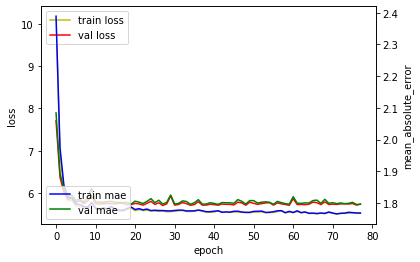

In [17]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['mae'], 'b', label='train mae')
acc_ax.plot(hist.history['val_mae'], 'g', label='val mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean_absolute_error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [18]:
model.save("second_linear_model2.h5")